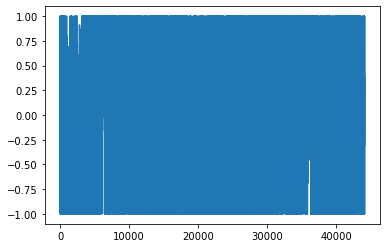

[0 0 0 ... 0 1 0]
  ø 5Àà     }ÿà  Àx        O¤ ð                                  ) äûàèÿýû~~ ÿ×ÿÕÃÿú7¦¾}4À   Eûýñ¹à   ÷þ§¿ýþÁ?ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿûÈÿùWÿþ¿ÿÿÿÿÿÿ8çÿÿÿÿ÷ÿ'ÿÿÿÿûÿûÿ¿ÿñ     À  1Åï&ÿÿüÿÿàÿ¿ÿÿÿÿ¯ÀÐÁd=ßÿûøÿû¶%B    ïÀ yÿïÿdÏô v        'ÿüs¦        à³ïýÿÿ¿ñÿÀÿ£çüÿÀ¯Å»p~¿÷üB GÿÇÿÿÿá@ Ï      @   @4ýïúÿÿ÷ÿÿùáOÿÿÿÿÿÿøÿÿÿÚ?ÿÿ÷ûÿûß?ýÿøØü¾t      	2À        Ï`  À         # þ0à            x   ç£Æ   	@ð  é 
Hÿú8ÿÿÿÿÝÿÿþÀ@ þ´ ðëÿÿÿïÿÿo,?ÿÿÿÿEÿÿï`   |   À   !óìïÿóïÿýÿÿú×ÿòÿÐ  ü T¿öIÿ¿ü póç @# @0 ßø¿ø?ÿÿýÿþ   G@ ?ÿÿÔ¿¿ýûÿÿýÿÿøÿÿÿÿÿÿÿÛþÿ÷ðÿýÿÿÿÿÿÿÿÿÿÿçß6ø  ÿÿÿnJ #`  ÿÿÿÿóÀ ?ÿóÎbÿÿßÿý¿ÿÿÿÿÿÿÿÿÿþýïÿÿ¿¿ÿÿÿÿÿÿÿÿÿÿÿÿÿØãÿÿ  ~ÿýÿÿÿÿ¸?ïÔÑãþ
      ²  H   À ÿÿçÿ!ÿÔMÿ¿·ÿÿÈ        `    @-ßßÿä `   Ç?îÿÿÿ2ûû÷ïÿ9ÿÄy^°G   Cÿÿýÿ¶ÿÆá  ?ÿµÿÿÿÿÿÿÿÏû         ÿ·


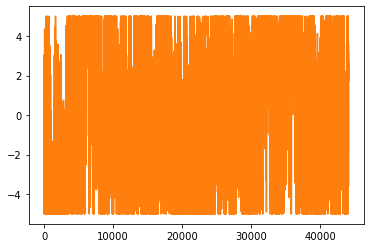

In [76]:
import comnumfip2
from importlib import reload
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

reload(comnumfip2)

fs=44100
duration=1
analog_test =[]
while len(analog_test)==0:
    analog = sd.rec(int(duration*fs),samplerate=fs,channels=1)
    sd.wait()
    #Filtre de réception
    mask = (analog<-0.9) | (analog>0.9) #On garde tout ce qui a une amplitude de plus de 0.9V
    analog_test = analog[mask]



plt.plot(analog)
plt.show()

fe=44100
t= np.arange(0,1/10000,1/fe)
motif = np.where((t<=(1/10000)),1,0)

plt.plot(motif)

analog=analog.flatten()

filtered_signal = np.correlate(analog, motif, mode='same')


plt.plot(filtered_signal)

bin=comnumfip2.sample_and_threshold(analog_test,0.5)
print(bin)
print(comnumfip2.bin2ascii(bin))


(40000.0, 50000.0)

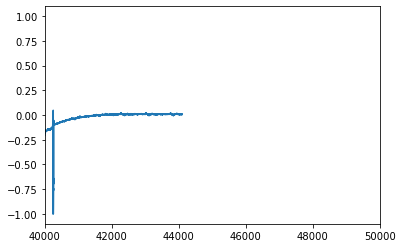

In [39]:
plt.plot(analog)
plt.xlim(40000,50000)